In [58]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
import matplotlib.pyplot as plt


Here I created a collection of solvent data we can use for the ML modell. The Rf value depends on the compund it selfe but also on the solvents and there ratio. Two main properties of the solvent mixture are important: 1. The ability to dissolve the compound. 2. The distraction of the polar interactions between the compund and silica. An adjustment of the named properties is possible by trying diffrent solvent ratios. The Solvents properties is roughly defined by some parameters of the collection. Here are some definitions of important parameters:

Elutropic_series: The elution effect is the ability of the solvent to entrain a substance. The arrangement is empirical and depends on the stationary phase used. However, the elutropic series usually correlates with the permittivities of the solvents.

Solubility_water: solubility is the ability of a substance, the solute, to form a solution with another substance, the solvent. It gives an information about the hydrophilicity of the solvent. And 





In [59]:


Solvent_data = {
    'Solvent': ['Hexane', 'Pentane', 'Cyclohexane', 'Cyclopentane', 'Toluene', 'Benzene', 'diethyl ether', 'DCM', 'Chloroform', 'Acetone', '1,4-Dioxane', 'ethyl acetate', 'tetrahydrofuran', 'Methyl tert-butyl ether', 'Dimethyl sulfoxide', 'MeCN', 'Pyridine', 'Isopropyl alcohol', 'EtOH', 'MeOH'],
    'Smiles': ['CCCCCC', 'CCCCC', 'C1CCCCC1', 'C1CCCC1', 'Cc1ccccc1', 'c1ccccc1', 'CCOCC', 'ClCCl', 'ClC(Cl)Cl', 'CC(=O)C', 'O1CCOCC1', 'O=C(OCC)C', 'C1CCOC1', 'O(C(C)(C)C)C', 'CS(=O)C', 'CC#N', 'c1ccncc1', 'CC(O)C', 'OCC', 'CO'],
    'Elutropic_series': [0.00, 0.00, 0.03, 0.04, 0.22, 0.25, 0.29, 0.30, 0.31, 0.43, 0.43, 0.45, 0.48, 0.48, 0.48, 0.50, 0.55, 0.60, 0.68, 0.73],
    'Density(20°C, g/ml)': [0.672, 0.626, 0.778, 0.751, 0.865, 0.879, 0.713, 1.324, 1.489, 0.79, 1.034 , 0.902, 0.888, 0.741, 1.10, 0.781, 0.982, 0.785, 0.789, 0.791],
    'Solubility_water (20°C, mg/L)': [9.5, 40.0, 60.0, 156.0, 520.0, 1790.0, 60500.0, 20000.0, 8090.0, np.nan, np.nan, 83000.0, np.nan, 26000, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'log P': [3.764, 3.255, np.nan, np.nan, 2.73, 2.13, 0.98, 1.19, np.nan, -0.24, np.nan, 0.71, np.nan, np.nan, np.nan, -0.334, 0.65, -0.16, -0.18, -0.69],
    'Viscosity (20°C, mPa*s)': [0.31, 0.23, 1.00, np.nan, 0.59, 0.65, 0.23, 0.43, 0.57, 0.32, 1.54, 0.45, 0.55, 0.27, 2.24, 0.36, 0.95, 2.3, 1.20, 0.55]
}

In [60]:
df_solvents = pd.DataFrame(Solvent_data)

In [61]:
df_solvents

,Solvent,Smiles,Elutropic_series,"Density(20°C, g/ml)","Solubility_water (20°C, mg/L)",log P,"Viscosity (20°C, mPa*s)"
0,n-Hexane,CCCCCC,0.00,0.672,9.5,3.764,0.31
1,n-Pentane,CCCCC,0.00,0.626,40.0,3.255,0.23
2,Cyclohexane,C1CCCCC1,0.03,0.778,60.0,NaN,1.00
3,Cyclopentane,C1CCCC1,0.04,0.751,156.0,NaN,NaN
4,Toluene,Cc1ccccc1,0.22,0.865,520.0,2.730,0.59
5,Benzene,c1ccccc1,0.25,0.879,1790.0,2.130,0.65
6,Diethyl ether,CCOCC,0.29,0.713,60500.0,0.980,0.23
7,Dichloromethane,ClCCl,0.30,1.324,20000.0,1.190,0.43
8,Chloroform,ClC(Cl)Cl,0.31,1.489,8090.0,NaN,0.57
9,Acetone,CC(=O)C,0.43,0.790,NaN,-0.240,0.32


Solvent info missing:

log P: Cycolhexane, Cyclopentane, Chloroform, 1,4-Dioxane, Tetrahydrofuran, MTBE, DMSO

Solubility: Benzene at 15°C, Acetone, 1,4-Dioxane, Tetrahydrofuran, DMSO, MeCN, Pyridine

Viscosity: Cyclopentane




In [62]:
def canonilze_smiles(Smiles: str):
    '''
       Converts Smile to a Mol file and back to a Smiles again to create
       a consistent Smiles string.

       Args: Smiles string
    '''
    mol = Chem.MolFromSmiles(Smiles)
    can_Smiles = Chem.MolToSmiles(mol)

    return can_Smiles


In [65]:
df_solvents['Smiles'] = df_solvents['Smiles'].apply(lambda x: canonilze_smiles(x))
df_solvents['Mol'] = df_solvents['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df_solvents['Mw (g/mol)'] = df_solvents['Mol'].apply(lambda x: Chem.Descriptors.MolWt(x))
df_solvents['log P (calc)'] = df_solvents['Mol'].apply(lambda x: Chem.Descriptors.MolLogP(x))
df_solvents['H_Bond_Donors'] = df_solvents['Mol'].apply(lambda x: Chem.rdMolDescriptors.CalcNumHBD(x))
df_solvents['H_Bond_Acceptors'] = df_solvents['Mol'].apply(lambda x: Chem.rdMolDescriptors.CalcNumHBA(x))


In [63]:
Polarity_Index_list = [0.1, 0.0, 0.2, 0.1, 2.4, 2.7, 2.8, 3.1, 4.1, 5.1, 4.8, 4.4, 4.0, 2.5, 7.2, 5.8, 5.3, 3.9, 4.3, 5.1]
ET30_values = [31.0, 31.0, 30.09, np.nan, 33.9, 34.3, 34.5, 40.7, 39.1, 42.2, 36.0, 38.1, 37.4, 34.7, 45.1, 45.6, 40.5, 48.4, 51.9, 55.4]
ET30N_values = [0.009, 0.009, 0.006, np.nan, 0.099, 0.111, 0.117, 0.309, 0.259, 0.355, 0.164, 0.228, 0.207, 0.124, 0.444, 0.46, 0.302, 0.546, 0.654, 0.762]
Dielectric_constant = [1.88, 1.84, 2.02, 1.87, 2.38, 2.27, 4.34, 8.93, 4.81, 20.7, 2.25, 6.02, 7.52, np.nan, 46.7, 37.5, 12.4, 18.3, 24.6, 32.6]
Dipole_moment = [0.0, 0.0, 0.0, 0.0, 0.36, 0.0, 1.15, 1.60, 1.04, 2.88, 0.45, 1.78, 1.75, 1.74, 3.92, 3.92, 2.2, 1.66, 1.69, 1.69]
Solvent_type = ['nonpolar', 'nonpolar', 'nonpolar', 'nonpolar', 'nonpolar', 'nonpolar', 'nonpolar', 'polar_aprotic', 'nonpolar', 'polar_aprotic', 'nonpolar', 'polar_aprotic', 'nonpolar', 'nonpolar', 'polar_aprotic', 'polar_aprotic', 'polar_aprotic', 'polar_protic', 'polar_protic', 'polar_protic']
df_solvents['Polarity_index'] = Polarity_Index_list
df_solvents['ET30 (kcal/mol)'] = ET30_values
df_solvents['ET30N'] = ET30N_values
df_solvents['Dielectric_constant'] = Dielectric_constant
df_solvents['Dipole_moment'] = Dipole_moment
df_solvents['Solvent_type'] = Solvent_type


In [64]:
df_solvents

,Solvent,Smiles,Elutropic_series,"Density(20°C, g/ml)","Solubility_water (20°C, mg/L)",log P,"Viscosity (20°C, mPa*s)",Polarity_index,ET30 (kcal/mol),ET30N,Dielectric_constant,Dipole_moment,Solvent_type
0,n-Hexane,CCCCCC,0.00,0.672,9.5,3.764,0.31,0.1,31.00,0.009,1.88,0.00,nonpolar
1,n-Pentane,CCCCC,0.00,0.626,40.0,3.255,0.23,0.0,31.00,0.009,1.84,0.00,nonpolar
2,Cyclohexane,C1CCCCC1,0.03,0.778,60.0,NaN,1.00,0.2,30.09,0.006,2.02,0.00,nonpolar
3,Cyclopentane,C1CCCC1,0.04,0.751,156.0,NaN,NaN,0.1,NaN,NaN,1.87,0.00,nonpolar
4,Toluene,Cc1ccccc1,0.22,0.865,520.0,2.730,0.59,2.4,33.90,0.099,2.38,0.36,nonpolar
5,Benzene,c1ccccc1,0.25,0.879,1790.0,2.130,0.65,2.7,34.30,0.111,2.27,0.00,nonpolar
6,Diethyl ether,CCOCC,0.29,0.713,60500.0,0.980,0.23,2.8,34.50,0.117,4.34,1.15,nonpolar
7,Dichloromethane,ClCCl,0.30,1.324,20000.0,1.190,0.43,3.1,40.70,0.309,8.93,1.60,polar_aprotic
8,Chloroform,ClC(Cl)Cl,0.31,1.489,8090.0,NaN,0.57,4.1,39.10,0.259,4.81,1.04,nonpolar
9,Acetone,CC(=O)C,0.43,0.790,NaN,-0.240,0.32,5.1,42.20,0.355,20.70,2.88,polar_aprotic


In [66]:
df_solvents.to_csv(r'/Users/matthiasgalka/git/ppchem_project/Data/Solvents.csv', index = False)

In [27]:
df_polarity = df_solvents.sort_values(by='Polarity_index')
df_eluent = df_solvents.sort_values(by='Elutropic_series')

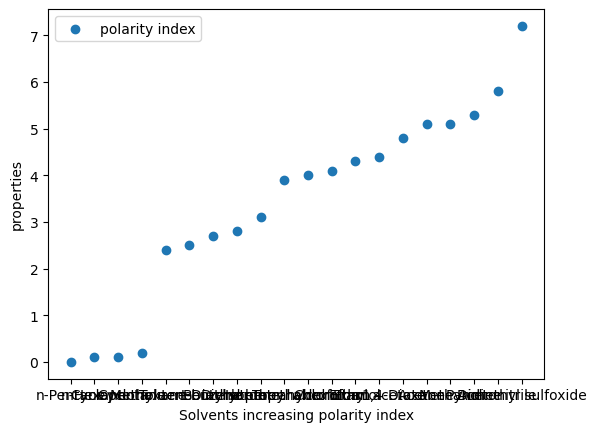

In [53]:
fig, ax = plt.subplots()
#ax.scatter(df_polarity["Solvent"], df_polarity["Elutropic_series"], label="Elutropic series")
ax.scatter(df_polarity["Solvent"], df_polarity["Polarity_index"], label="polarity index")
#ax.scatter(df_polarity["Solvent"], df_polarity["Dielectric_constant"], label="Dielectric constant")
#ax.scatter(df_polarity["Solvent"], df_polarity["Dipole_moment"], label="Dipole moment")
#ax.scatter(df_polarity["Solvent"], df_polarity["ET30N"], label="ET30N")

ax.set_xlabel('Solvents increasing polarity index')
ax.set_ylabel("properties")
ax.legend()

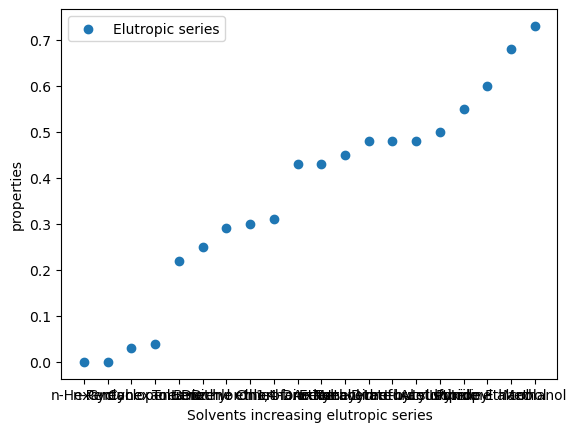

In [51]:
fig, ax = plt.subplots()
ax.scatter(df_eluent["Solvent"], df_eluent["Elutropic_series"], label="Elutropic series")
#ax.scatter(df_eluent["Solvent"], df_eluent["Polarity_index"], label="polarity index")
#ax.scatter(df_eluent["Solvent"], df_eluent["Dielectric_constant"], label="Dielectric constant")
#ax.scatter(df_eluent["Solvent"], df_eluent["Dipole_moment"], label="Dipole moment")
#ax.scatter(df_eluent["Solvent"], df_eluent["ET30N"], label="ET30N")

ax.set_xlabel('Solvents increasing elutropic series')
ax.set_ylabel("properties")
ax.legend()